## Network Inspectors

The ```network_inspectors()``` module allows you to inspect the LANs directly. We will be grateful if you report any strange behavior you might find.

In [ ]:
# MODULE IMPORTS ----

# warning settings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# 
import hddm

# Make simulators visible
import sys
#sys.path.append('simulators')

# Data management
import pandas as pd
import numpy as np
import pickle

# Plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Stats functionality
from statsmodels.distributions.empirical_distribution import ECDF

### Direct access to batch predictions


You can use the ```hddm.network_inspectors.get_torch_mlp()``` function to access network predictions.

In [2]:
# Specify model
model = 'angle'
lan_angle = hddm.network_inspectors.get_torch_mlp(model = model)

In [3]:
# Make some random parameter set
parameter_df = hddm.simulators.make_parameter_vectors_nn(model = model,
                                                         param_dict = None,
                                                         n_parameter_vectors = 1)

parameter_matrix = np.tile(np.squeeze(parameter_df.values), (200, 1))

# Initialize network input
network_input = np.zeros((parameter_matrix.shape[0], parameter_matrix.shape[1] + 2)) # Note the + 2 on the right --> we append the parameter vectors with reaction times (+1 columns) and choices (+1 columns)

# Add reaction times
network_input[:, -2] = np.linspace(0, 3, parameter_matrix.shape[0])

# Add choices
network_input[:, -1] = np.repeat(np.random.choice([-1, 1]), parameter_matrix.shape[0])

# Note: The networks expects float32 inputs
network_input = network_input.astype(np.float32)

# Show example output
print('Some network outputs')
print(lan_angle(network_input)[:10]) # printing the first 10 outputs
print('Shape')
print(lan_angle(network_input).shape) # original shape of output

Some network outputs
[[-6.5302672 ]
 [ 0.5264376 ]
 [ 0.41089576]
 [-0.5228093 ]
 [-1.0521748 ]
 [-1.5529907 ]
 [-2.0735157 ]
 [-2.6183674 ]
 [-3.2071757 ]
 [-3.8784742 ]]
Shape
(200, 1)


### Plotting Utilities

HDDM provides two plotting function to investigate the network outputs directly. The ```kde_vs_lan_likelihoods()``` plot and the ```lan_manifold()``` plot. 

#### `kde_vs_lan_likelihoods()`

In [4]:
# Make some parameters
parameter_df = hddm.simulators.make_parameter_vectors_nn(model = model,
                                                         param_dict = None,
                                                         n_parameter_vectors = 10)

In [5]:
parameter_df

,v,a,z,t,theta
0,-0.380690,0.464706,0.353436,1.560247,0.389833
1,-2.365569,0.617760,0.311046,1.962950,1.357741
2,-1.755573,1.367745,0.698188,0.502517,0.048768
3,0.978235,1.797830,0.351825,1.292371,0.292236
4,2.874907,1.176713,0.415459,0.025948,0.801428
5,2.506800,1.739944,0.415957,1.990556,0.926307
6,-1.559200,1.704355,0.312010,1.045885,-0.082756
7,-1.689323,1.589772,0.417701,1.103256,0.687722
8,0.790908,1.580404,0.215814,1.149728,1.360919
9,-0.512678,0.838992,0.329891,1.840205,1.139870


1 of 10
2 of 10
3 of 10
4 of 10
5 of 10
6 of 10
7 of 10
8 of 10
9 of 10
10 of 10


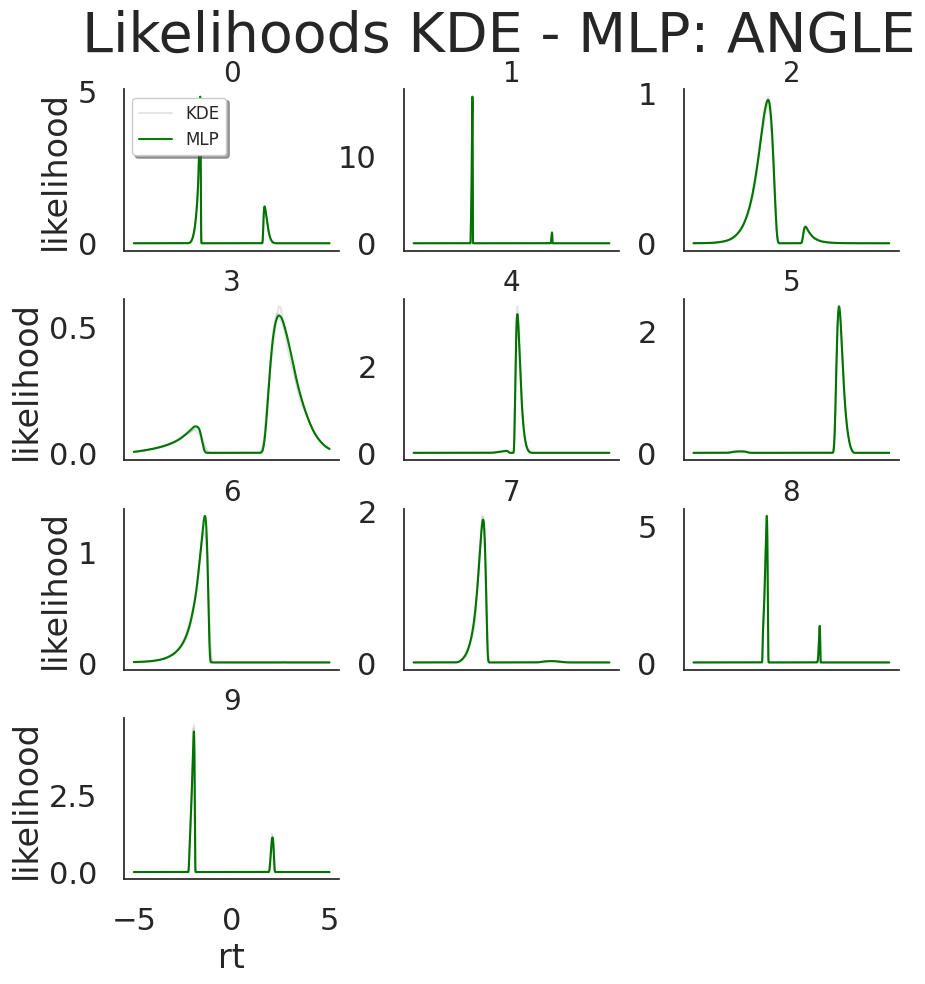

In [6]:
hddm.network_inspectors.kde_vs_lan_likelihoods(parameter_df = parameter_df, 
                                               model = model,
                                               cols = 3,
                                               n_samples = 2000,
                                               n_reps = 2,
                                               show = True)

#### `lan_manifold()`

Lastly, you can use the ```lan_manifold()``` plot to investigate the LAN likelihoods over a range of parameters. 

The idea is to use a base parameter vector and vary one of the parameters in a prespecificed range. 

This plot can be informative if you would like to understand better how a parameter affects model behavior.

Using only the first row of the supplied parameter array !


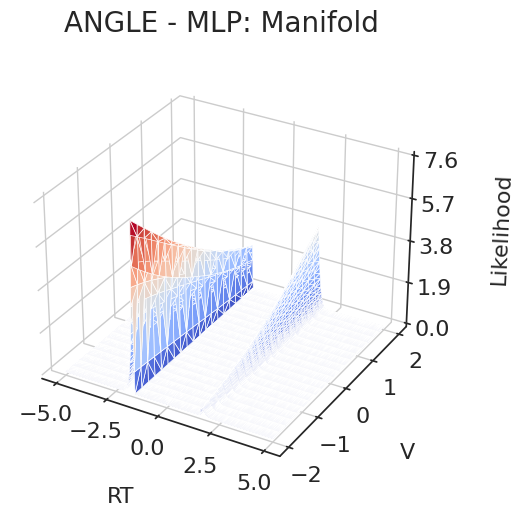

In [7]:
# Now plotting
hddm.network_inspectors.lan_manifold(parameter_df = parameter_df,
                                     vary_dict = {'v': np.linspace(-2, 2, 20)},
                                     model = model,
                                     n_rt_steps = 300,
                                     fig_scale = 1.0,
                                     max_rt = 5,
                                     save = True,
                                     show = True)